### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
# Importación de librerías necesarias
import matplotlib.pyplot as plt
import matplotlib as mpl

#1. Análisis de facturación



In [3]:
# Variables
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

In [4]:
# Calculamos la facturación de las tiendas
facturacion_tienda = [tienda['Precio'].sum() for tienda in tiendas]

# Mostramos los resultados
for iter in range(len(facturacion_tienda)):
  print(f'La tienda {iter+1} facturó: $ {facturacion_tienda[iter]:,.2f}')

La tienda 1 facturó: $ 1,150,880,400.00
La tienda 2 facturó: $ 1,116,343,500.00
La tienda 3 facturó: $ 1,098,019,600.00
La tienda 4 facturó: $ 1,038,375,700.00


Ahora que se analizaron las facturaciones surge la duda, **¿Cuál fue la tienda con mayor y menor facturación?**

In [5]:
# Creamos un diccionario
facturacion_tiendas = dict(zip(nombres, facturacion_tienda))

# Buscamos la tienda con mayor facturación
mayor_facturacion = max(facturacion_tiendas, key=facturacion_tiendas.get)
print(f'La tienda con mayor facturación fue la {mayor_facturacion} con un monto de: $ {facturacion_tiendas[mayor_facturacion]:,.2f}')

La tienda con mayor facturación fue la Tienda 1 con un monto de: $ 1,150,880,400.00


In [6]:
# Tienda con menor facturación
menor_facturacion = min(facturacion_tiendas, key=facturacion_tiendas.get)
print(f'La tienda con menor facturación fue la {menor_facturacion} con un monto de: $ {facturacion_tiendas[menor_facturacion]:,.2f}')

La tienda con menor facturación fue la Tienda 4 con un monto de: $ 1,038,375,700.00


Para un mejor entendimiento de este análisis, se sugiere el siguiente elemento gráfico.

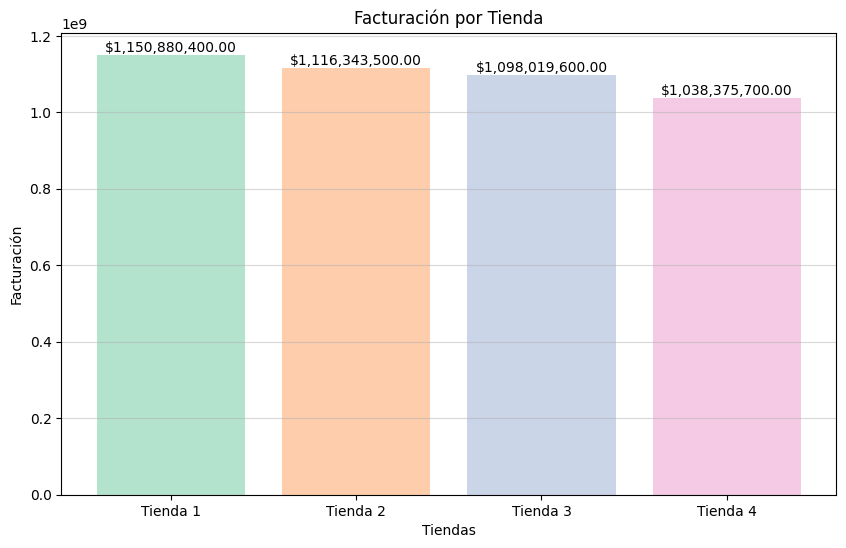

In [7]:
def muestra_facturaciones():
  # Nombres de las tiendas (Axis X)
  tiendas = list(facturacion_tiendas.keys())

  # Facturaciones (Axis Y)
  facturaciones = list(facturacion_tiendas.values())

  # Gráfico de barras
  plt.figure(figsize=(10, 6))

  # Colores del gráfico
  paleta = mpl.colormaps['Pastel2']
  colores = [paleta(iter) for iter in range(len(nombres))]
  bars = plt.bar(tiendas, facturaciones, color=colores)

  # Labels
  plt.xticks(rotation=0)
  plt.xlabel('Tiendas')
  plt.ylabel('Facturación')
  plt.title('Facturación por Tienda')
  plt.grid(axis='y', linestyle='-', alpha=0.5)

  # Valores
  for iter, valor in enumerate(facturaciones):
    plt.text(iter, valor, f'${valor:,.2f}', ha='center', va='bottom')


  # Mostrar el gráfico
  plt.show()

muestra_facturaciones()

Con este apoyo visual se concluye que la Tienda 1 es la que lidera la facturación.

# 2. Ventas por categoría

Ahora se busca saber el total de ventas por categoría de productos.

In [8]:
def ventas_cat():
  # Creamos un diccionario con los datos proporcionados
  datos_tiendas = dict(zip(nombres, tiendas))

  # Calculamos las ventas por categoría
  ventas_por_categoria = pd.DataFrame()

  for nombre, tienda in datos_tiendas.items():
    ventas_categoria = tienda.groupby('Categoría del Producto')['Precio'].sum()
    ventas_por_categoria[nombre] = ventas_categoria

  # Mostramos los resultados
  print(ventas_por_categoria)

  return ventas_por_categoria

ventas_por_cat = ventas_cat()


                            Tienda 1     Tienda 2     Tienda 3     Tienda 4
Categoría del Producto                                                     
Artículos para el hogar   12698400.0   14746900.0   15060000.0   15074500.0
Deportes y diversión      39290000.0   34744500.0   35593100.0   33350100.0
Electrodomésticos        363685200.0  348567800.0  329237900.0  283260200.0
Electrónicos             429493500.0  410831100.0  410775800.0  409476100.0
Instrumentos musicales    91299000.0  104990300.0   77380900.0   75102400.0
Juguetes                  17995700.0   15945400.0   19401100.0   20262200.0
Libros                     8784900.0   10091200.0    9498700.0    9321300.0
Muebles                  187633700.0  176426300.0  201072100.0  192528900.0


Ya que tenemos la información, creamos un apoyo visual para comprender estos datos.

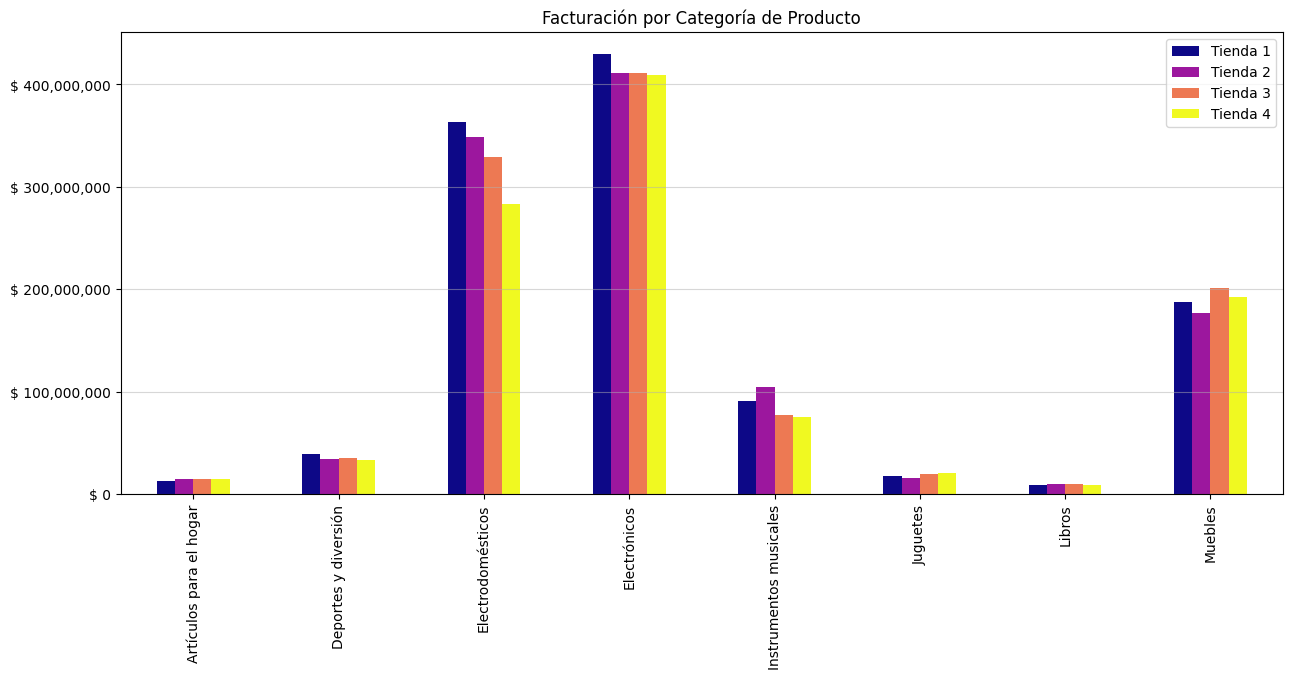

In [9]:
# Graficamos
def muestra_ventas_cat():
  # Nombres de las categorías (Axis X)
  ax = ventas_por_cat.plot(kind='bar', figsize=(15, 6), colormap='plasma')
  # Labels
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_title('Facturación por Categoría de Producto')
  plt.xticks(rotation=90, ha='center')
  plt.grid(axis='y', linestyle='-', alpha=0.5)

  # Formateamos
  ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'$ {x:,.0f}'))

  # Mostrar el gráfico
  plt.show()

muestra_ventas_cat()

**Resultados del análisis**
+ La categoría de productos electrónicos son los más vendidos en todas las tiendas.
+ La categoría de libros es la que menos ventas ha tenido en todas las tiendas.

Debido al costo unitario de cada producto, sin importar la categoría. Se debe de tener en cuenta su valor, ya que, en este caso se muestra una facturación mayor de productos electrónicos al costo de los mismos.

# 3. Calificación promedio de la tienda


In [10]:
def calificacion_tienda():
  datos_tiendas = dict(zip(nombres, tiendas))

  calificacion_promedio = {}

  for nombre, tienda in datos_tiendas.items():
    promedio = tienda['Calificación'].mean()
    calificacion_promedio[nombre] = promedio

    # Mostramos los datos
    print(f'La calificación promedio de la {nombre} es: {promedio:.6f}')

  return calificacion_promedio

calificacion_promedio = calificacion_tienda()

La calificación promedio de la Tienda 1 es: 3.976685
La calificación promedio de la Tienda 2 es: 4.037304
La calificación promedio de la Tienda 3 es: 4.048326
La calificación promedio de la Tienda 4 es: 3.995759


Una vez que sabemos el promedio, necesitamos presentar la información.

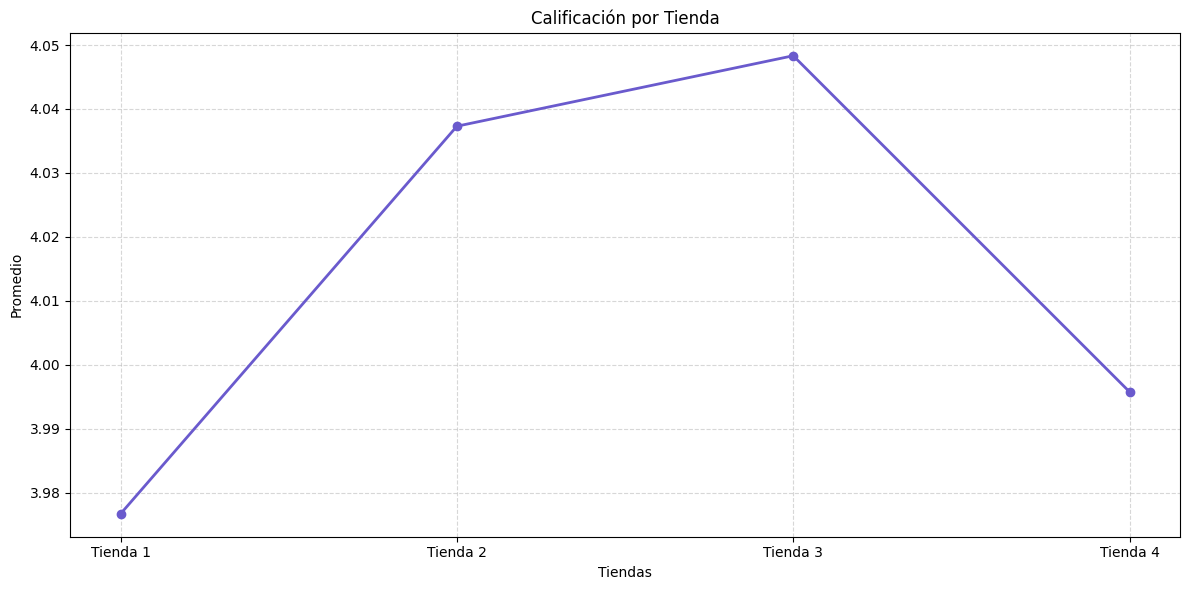

In [11]:
def muestra_calificacion_lineas():
    tiendas = list(calificacion_promedio.keys())
    promedios = list(calificacion_promedio.values())

    plt.figure(figsize=(12, 6))

    plt.plot(tiendas, promedios, marker='o', linestyle='-', color='slateblue', linewidth=2)

    plt.title("Calificación por Tienda")
    plt.xlabel("Tiendas")
    plt.ylabel("Promedio")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

muestra_calificacion_lineas()

Los datos resultantes nos muestran lo siguiente:
+ La tienda 3 es la que más calificación promedio tiene con un total de 4.048.
+ La tienda 1 es la que menor calificación promedio tiene con un total de 3.976.
+ La tienda 2 queda en el segundo puesto con una calificación promedio de 4.037.
+ La tienda 4 queda en el tercer puesto con una calificación promedio de 3.995.

Se verifica que todas las tiendas tienen una calificación cercana, que va en el intervalo $$[3.97, 4.048]$$

lo que nos indica que la valoración en las tiendas es positiva en general.

# 4. Productos más y menos vendidos

In [12]:
def min_max():
  datos_tiendas = dict(zip(nombres, tiendas))

  ventas_categoria = pd.DataFrame({
      'Tienda 1': tienda['Categoría del Producto'].value_counts(),
      'Tienda 2': tienda2['Categoría del Producto'].value_counts(),
      'Tienda 3': tienda3['Categoría del Producto'].value_counts(),
      'Tienda 4': tienda4['Categoría del Producto'].value_counts()
  })

  return ventas_categoria

ventas_categoria = min_max()

resultado_max = pd.DataFrame({
    'Categoría más vendida': ventas_categoria.idxmax(),
    'Cantidad vendida': ventas_categoria.max()
})

resultado_min = pd.DataFrame({

    'Categoría menos vendida': ventas_categoria.idxmin(),
    'Cantidad vendida': ventas_categoria.min()
})
print(resultado_max)
print('\n\n\n')
print(resultado_min)




         Categoría más vendida  Cantidad vendida
Tienda 1               Muebles               465
Tienda 2               Muebles               442
Tienda 3               Muebles               499
Tienda 4               Muebles               480




          Categoría menos vendida  Cantidad vendida
Tienda 1  Artículos para el hogar               171
Tienda 2  Artículos para el hogar               181
Tienda 3  Artículos para el hogar               177
Tienda 4   Instrumentos musicales               170


El análisis de los datos nos muestra la cantidad vendida (máximos y minimos) de las categorías de productos.

Ahora nos ayudaremos con un gráfico para visualizar mejor estos resultados.

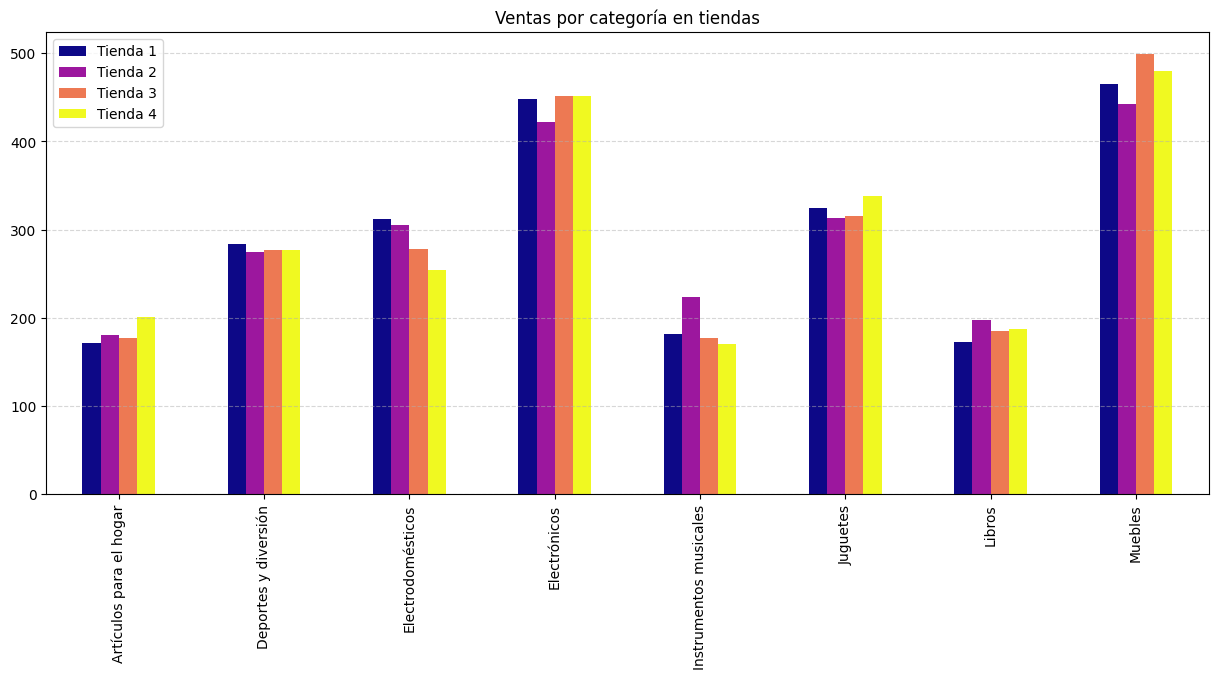

In [13]:
def muestra_minmax():
  # Creación del gráfico
  ax = ventas_categoria.plot(kind='bar', figsize=(15,6), colormap='plasma')

  plt.title('Ventas por categoría en tiendas')
  ax.set_xlabel('')

  plt.xticks(rotation=90)

  plt.grid(axis='y', linestyle='--', alpha=0.5)

  plt.show()

muestra_minmax()

Con este gráfico podemos observar que las categorías de *Muebles* y *Electrónicos* son las más vendidas en todas las tiendas.

La tienda 3 lidera las ventas de muebles mientras que las ventas de electrónicos hay un margen de venta casi nulo entre la tienda 3 y la tienda 4.

La categoría de *Artículos para el hogar* es la que menos ventas tiene en las categorías existentes. La tienda 4 lidera las ventas de artículos para el hogar.

La tienda 4 es la que menos instrumentos musicales ha vendido en comparación con las demás tiendas.

# 5. Envío promedio por tienda

In [14]:
def envio_promedio():
  datos_tiendas = dict(zip(nombres, tiendas))

  costo_envio_prom = {}

  for nombre, tienda in datos_tiendas.items():
    promedio = tienda['Costo de envío'].mean()

    costo_envio_prom[nombre] = promedio

    print(f'El costo de envío promedio en la {nombre} es: $ {promedio:,.2f}')

  return costo_envio_prom

envio_promedio = envio_promedio()


El costo de envío promedio en la Tienda 1 es: $ 26,018.61
El costo de envío promedio en la Tienda 2 es: $ 25,216.24
El costo de envío promedio en la Tienda 3 es: $ 24,805.68
El costo de envío promedio en la Tienda 4 es: $ 23,459.46


In [15]:
def envio_total():
  datos_tiendas = dict(zip(nombres, tiendas))

  envio_total = {}

  for nombre, tienda in datos_tiendas.items():
    total = tienda['Costo de envío'].sum()

    envio_total[nombre] = total

    print(f'El costo de envío total en la {nombre} es: $ {total:,.2f}')


  return envio_total


costo_envio_total = envio_total()

El costo de envío total en la Tienda 1 es: $ 61,377,900.00
El costo de envío total en la Tienda 2 es: $ 59,485,100.00
El costo de envío total en la Tienda 3 es: $ 58,516,600.00
El costo de envío total en la Tienda 4 es: $ 55,317,400.00


Ya que tenemos los datos del costo de envío promedio y total por cada tienda, tenemos que mostrar los resultados obtenidos en un elemento visual.

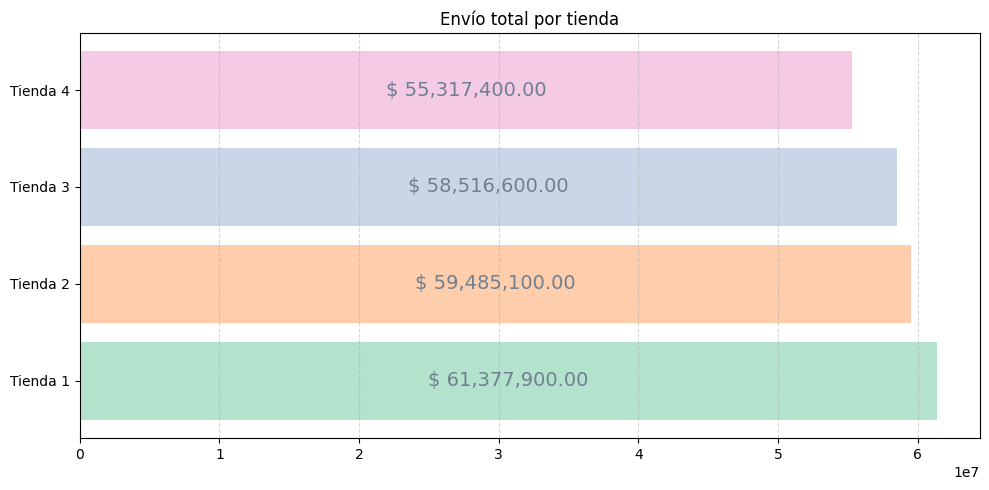

In [16]:
def grafico_barras_costos():
    tiendas = list(costo_envio_total.keys())
    costos = list(costo_envio_total.values())

    plt.figure(figsize=(10, 5))
    paleta = mpl.colormaps['Pastel2']
    colores = [paleta(iter) for iter in range(len(tiendas))]
    bars = plt.barh(tiendas, costos, color=colores)

    for iter, valor in enumerate(costos):
        plt.text(valor / 2, iter, f'$ {valor:,.2f}', va='center', ha='center', color='slategray', fontsize=14)

    plt.xlabel('')
    plt.title('Envío total por tienda')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

grafico_barras_costos()



Con esta herramienta visual podemos concluir lo siguiente:
+ La Tienda 1 es la que más costos de envío genera. Esto indica un alto índice de ventas, por lo que no es extraño que lidere este análisis.
+ La Tienda 4 es la que menos costos de envío genera. Lo cual indica un bajo índice de ventas.

Teniendo esto en mente nos surge la siguiente interrogante.

¿Cuánto es la diferencia entre la tienda 1 y la tienda 4 en el aspecto de rendimiento?



In [17]:
facturacion_tienda_1 = facturacion_tiendas[mayor_facturacion]
facturacion_tienda_4 = facturacion_tiendas[menor_facturacion]

envio_prom_tienda_1 = envio_promedio['Tienda 1']
envio_prom_tienda_4 = envio_promedio['Tienda 4']

print(f'Facturación de la Tienda 1: $ {facturacion_tienda_1:,.2f}')
print(f'Facturación de la Tienda 4: $ {facturacion_tienda_4:,.2f}')
print(f'Costo de envío promedio de la Tienda 1: $ {envio_prom_tienda_1:,.2f}')
print(f'Costo de envío promedio de la Tienda 4: $ {envio_prom_tienda_4:,.2f}')

Facturación de la Tienda 1: $ 1,150,880,400.00
Facturación de la Tienda 4: $ 1,038,375,700.00
Costo de envío promedio de la Tienda 1: $ 26,018.61
Costo de envío promedio de la Tienda 4: $ 23,459.46


Podemos notar a simple vista que la facturación de la Tienda 1 supera a la Tienda 4 por un margen de más de $ 100,000,000.

Incluso sabemos que el costo de envío en la Tienda 1 es mayor al de la Tienda 4.



# Análisis geográfico

In [18]:
import folium
from folium.plugins import HeatMap

# Agregar columna 'Tienda' a cada DataFrame en la lista
for item in range(len(tiendas)):
    tiendas[item]['Tienda'] = nombres[item]

# Unir todas las tiendas en un solo DataFrame
df_tiendas = pd.concat(tiendas, ignore_index=True)

# Eliminar filas con valores nulos en latitud o longitud
df_tiendas = df_tiendas.dropna(subset=['lat', 'lon'])

# Crear mapa centrado en el promedio de coordenadas
mapa = folium.Map(location=[df_tiendas['lat'].mean(), df_tiendas['lon'].mean()], zoom_start=5)

# Crear datos para el mapa de calor
datos_calor = [[row['lat'], row['lon'], row['Precio']] for _, row in df_tiendas.iterrows()]

# Añadir el mapa de calor al mapa base
HeatMap(datos_calor, radius=13).add_to(mapa)

# Mostrar el mapa
mapa

# Informe final

---

## Ingresos totales

El objetivo de este análisis fue identificar el comportamiento de ventas en las cuatro tiendas de la cadena a partir de sus registros de facturación.

### Facturación total por tienda

Se calcularon las sumas totales de ventas (`Precio`) para cada tienda, con los siguientes resultados:

- **Tienda 1:** \\$ 1,150,880,400.00

- **Tienda 2:** \\$ 1,116,343,500.00

- **Tienda 3:** \\$ 1,098,019,600.00

- **Tienda 4:** \\$ 1,038,375,700.00  

La tienda con mayor facturación fue la Tienda 1, superando los \\$ 1.15 mil millones. La Tienda 4 registró la menor facturación, con poco más de \\$ 1.03 mil millones.

### Visualización

El siguiente gráfico de barras permite comparar visualmente la facturación total de cada tienda:

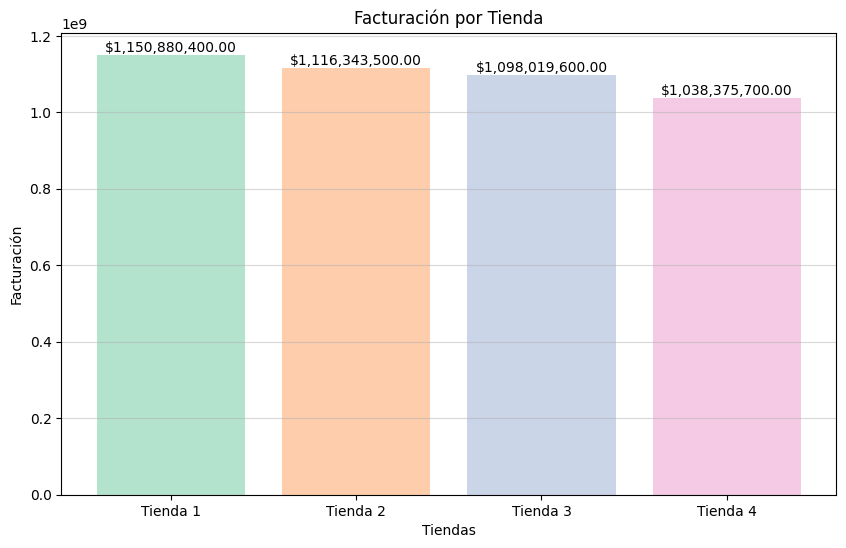

Este gráfico muestra que existe una diferencia significativa de más de **$100 millones** entre la Tienda 1 y la Tienda 4.

### Conclusión

- **Tienda 1** lidera claramente en facturación, lo que sugiere un mayor volumen de ventas o precios promedio más altos.

- **Tienda 4** tiene la facturación más baja, lo cual podría estar relacionado con factores geográficos, de demanda local o de eficiencia operativa.

- Las **Tiendas 2 y 3** presentan rendimientos intermedios y relativamente similares.

---

## Categorías de productos

En este análisis se evaluó la facturación total de cada tienda según la categoría del producto vendido. Estos resultados nos permiten entender qué tipos de productos generan mayores ingresos en cada tienda.

### Visualización

El siguiente gráfico muestra la facturación por categoría de producto para cada tienda:

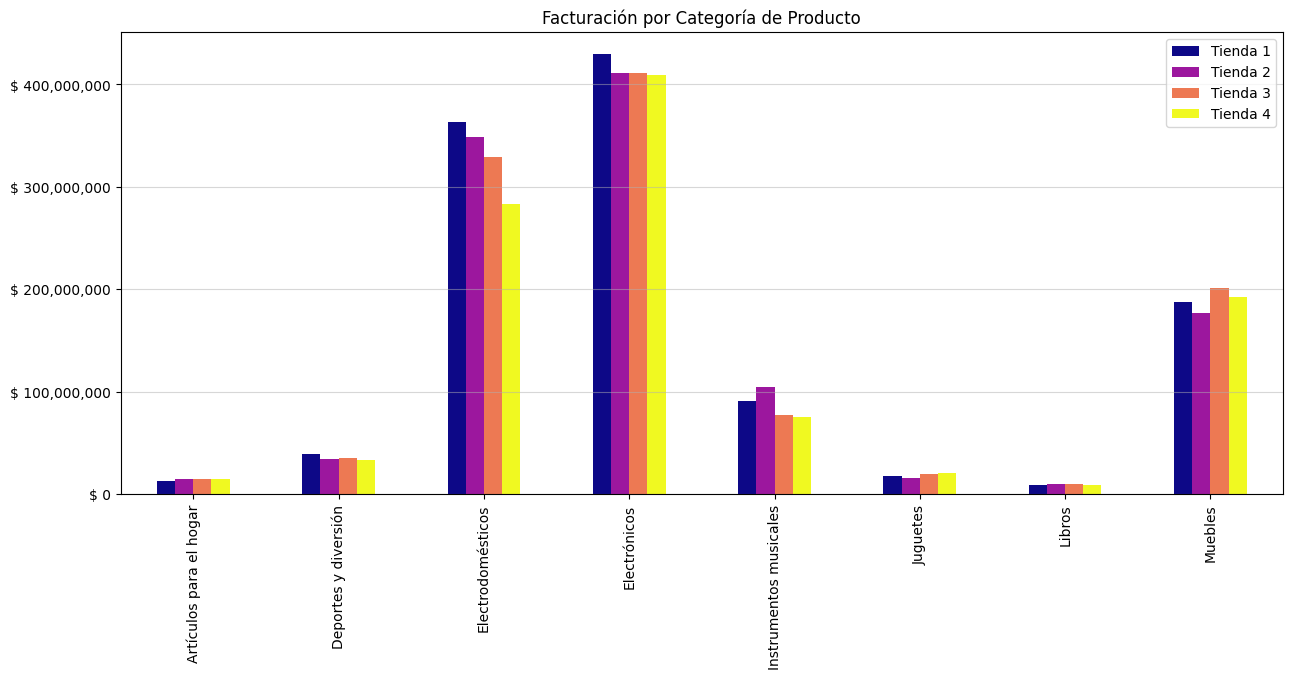

### Conclusiones

- **Electrónicos** es la categoría con mayor facturación en todas las tiendas. Cada una supera los **$ 400 millones** en esta categoría, lo que la convierte en el principal generador de ingresos.

- La categoría de **Electrodomésticos** también destaca, especialmente en la **Tienda 1**, donde supera los **$ 360 millones**.

- La categoría **Muebles** ocupa un tercer lugar, con cifras cercanas o superiores a los **$ 180 millones**.

- Las categorías **Artículos para el hogar**, **Libros** y **Juguetes** muestran facturaciones menores, lo que indica menor impacto en los ingresos generales.

- La categoría de **Instrumentos musicales** presenta un rendimiento sobresaliente en la **Tienda 2**, siendo esta tienda la única que supera los **$ 100 millones** en esta categoría.

### Recomendaciones

- Profundizar en la estrategia de productos **electrónicos y electrodomésticos**, dado su alto impacto en la facturación.

- Evaluar el desempeño de las categorías de menor rendimiento para identificar oportunidades de mejora, promoción o eliminación.

- Analizar las razones detrás del excelente rendimiento en **Instrumentos musicales** en la **Tienda 2** y replicar estrategias en otras tiendas.

---

## Calificaciones promedio

Este análisis presenta la evaluación de las tiendas basada en las calificaciones otorgadas por los clientes. El objetivo es comparar el desempeño general de cada tienda desde la perspectiva del cliente.

### Visualización

El siguiente gráfico de líneas representa la calificación promedio obtenida por cada tienda:

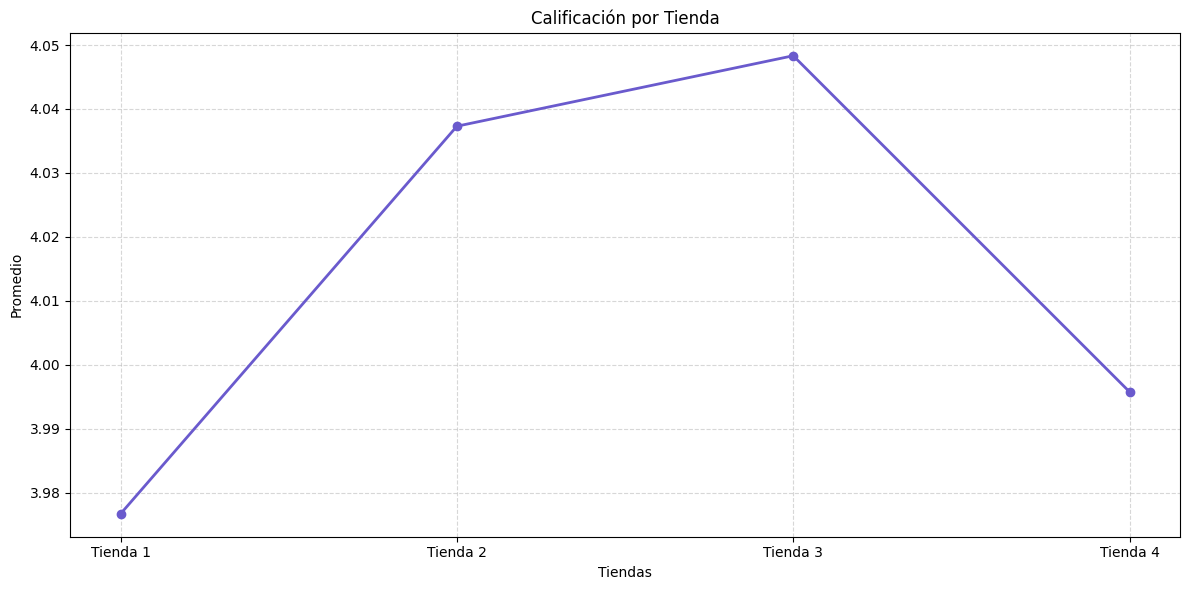

### Conclusiones

- La **Tienda 3** obtuvo la mejor calificación promedio, con **4.048**, lo que sugiere un alto nivel de satisfacción del cliente.

- Le siguen de cerca la **Tienda 2** y la **Tienda 4**, con valores ligeramente inferiores, pero aún por encima del 4.0.

- La **Tienda 1** es la que presenta la calificación más baja (**3.976**), aunque la diferencia entre tiendas es mínima.

- Todas las tiendas se ubican dentro de un rango estrecho de calificación, lo que indica consistencia en la calidad general.

### Recomendaciones

- Investigar qué factores hacen que **Tienda 3** y **Tienda 2** destaquen en la calificación de los clientes.

- Revisar los aspectos de servicio o productos en la **Tienda 1** que puedan estar influyendo negativamente en su evaluación.

- Mantener estándares de calidad altos y homogéneos en todas las tiendas para mejorar la percepción del cliente.

---

## Productos más y menos vendidos

Este análisis muestra la cantidad de productos vendidos por categoría en cada una de las tiendas. Nos permite identificar cuáles son las categorías más populares y cuáles tienen menor demanda.

### Visualización

A continuación, se presenta un gráfico de barras que muestra la cantidad de productos vendidos por categoría en cada tienda:

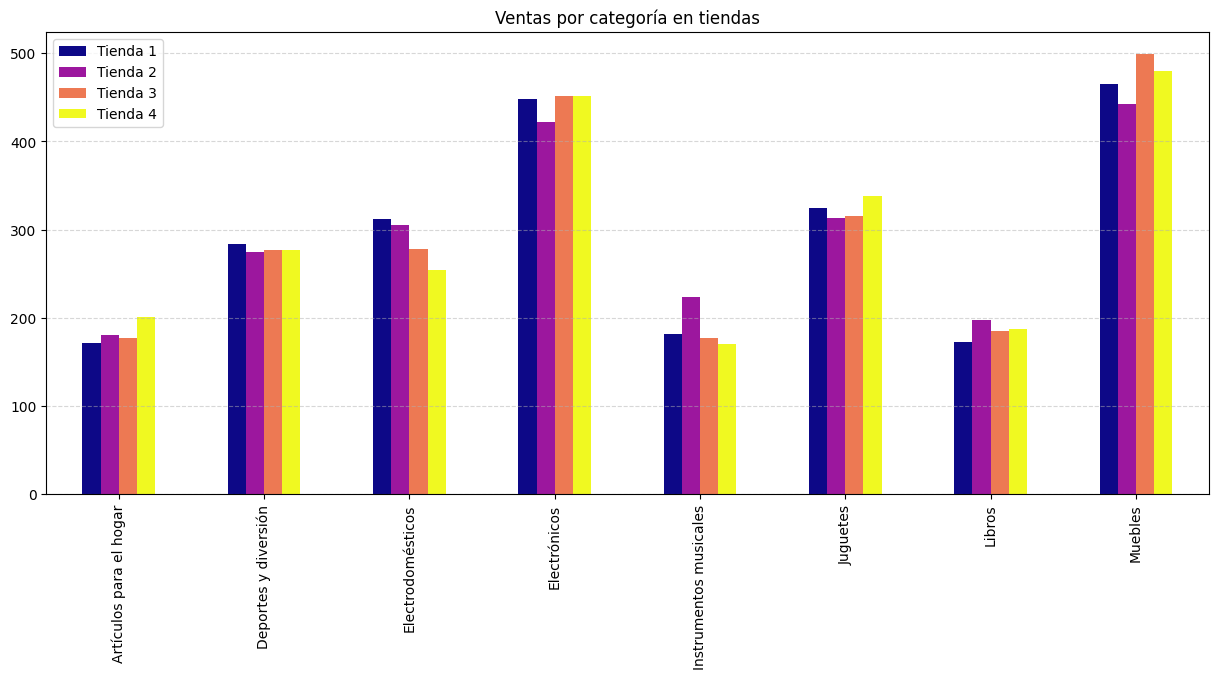

### Conclusiones

- **Muebles** es la categoría más vendida en todas las tiendas, lo que indica una fuerte demanda de este tipo de productos.

- **Artículos para el hogar** es la categoría menos vendida en tres de las cuatro tiendas.

- **Instrumentos musicales** es la categoría menos vendida únicamente en **Tienda 4**, lo que podría indicar una diferencia en el inventario o en las preferencias de los clientes de esa tienda.

### Recomendaciones

- Evaluar las razones detrás del bajo rendimiento de la categoría de **Artículos para el hogar**, ya sea por falta de promoción, precio, o baja rotación.

- Aprovechar el alto rendimiento de la categoría  **Muebles** para reforzar estrategias de ventas cruzadas y fidelización.

---

## Costo de envío promedio y diferencia

Este análisis presenta el costo de envío promedio y total en cada tienda. Estos datos ayudan a entender la carga operativa y logística por tienda, así como la eficiencia en los costos.

### Visualización

A continuación se presenta un gráfico de barras horizontales que muestra el costo total de envío por tienda:

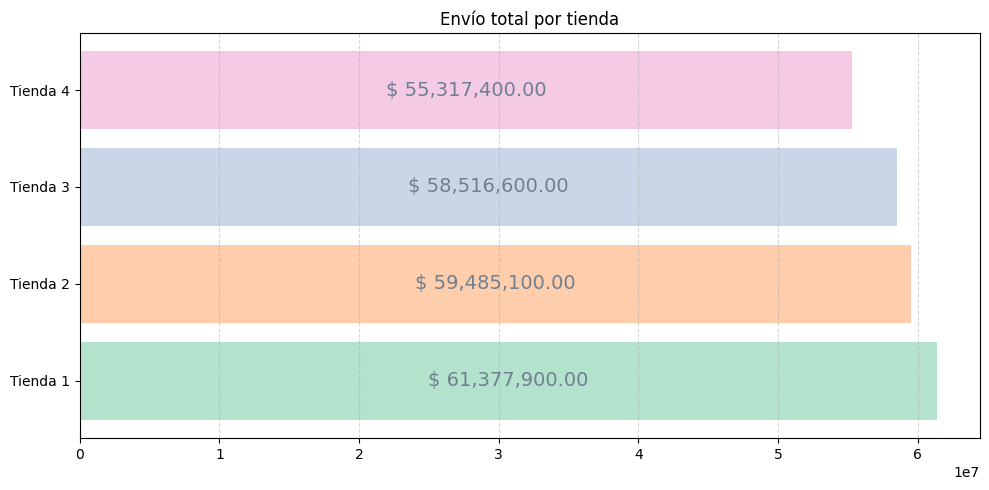
### Conclusiones

- La **Tienda 1** tiene el costo de envío **promedio y total** más alto. Esto puede deberse a una mayor cantidad de pedidos, mayor dispersión geográfica, o diferencias en la política de envíos.

- La **Tienda 4** es la más eficiente en términos de costos de envío, tanto en promedio como en total.

- La diferencia entre el mayor y menor costo total es de más de **$6 millones**, lo cual podría ser significativo al evaluar estrategias de optimización logística.

### Recomendaciones

- Revisar las rutas logísticas de la **Tienda 1**, buscando oportunidades de ahorro y eficiencia.

- Investigar si el menor costo en la **Tienda 4** afecta la experiencia del cliente o si es


### Diferencia de facturación

$$
\begin{align*}
\text{Diferencia} &= \text{Facturación Tienda 1} - \text{Facturación Tienda 4} \\
&= 1,150,880,400 - 1,038,375,700 \\
&= \boxed{112,504,700}
\end{align*}
$$

**La Tienda 1 facturó \$112,504,700 más** que Tienda 4.

---

### Diferencia en el costo de envío promedio

$$
\begin{align*}
\text{Diferencia} &= \text{Costo envío promedio Tienda 1} - \text{Tienda 4} \\
&= 26,018.61 - 23,459.46 \\
&= \boxed{2,559.15}
\end{align*}
$$

**La Tienda 1 tiene un costo promedio de envío \$2,559.15 mayor** que la Tienda 4.

---

### Rendimiento (Facturación / Costo de envío promedio)

$$
\begin{align*}
R_1 &= \frac{1,150,880,400}{26,018.61} \approx 44,240.79 \\
R_4 &= \frac{1,038,375,700}{23,459.46} \approx 44,264.48 \\
\end{align*}
$$

### Diferencia porcentual:

$$
\begin{align*}
\text{Diferencia porcentual} &= \left( \frac{R_4 - R_1}{R_1} \right) \times 100 \\
&= \left( \frac{44,264.48 - 44,240.79}{44,240.79} \right) \times 100 \\
&= \left( \frac{23.69}{44,240.79} \right) \times 100 \\
&\approx \boxed{0.054\%}
\end{align*}
$$

Aunque la Tienda 4 factura menos, **su rendimiento logístico es 0.054% superior**.

---

### Comparativa resumen

| **Indicador**                     | **Tienda 1**        | **Tienda 4**        | **Diferencia**               |
|----------------------------------|---------------------|---------------------|------------------------------|
| Facturación total                | \$1,150,880,400     | \$1,038,375,700     | \$112,504,700 más (T1)       |
| Costo de envío promedio          | \$26,018.61         | \$23,459.46         | \$2,559.15 más (T1)          |
| Rendimiento (facturación/envío) | 44,240.79           | 44,264.48           | 0.054% más (T4)              |

---

## Entonces ...

- **La Tienda 1** genera más ingresos, pero **también tiene mayores costos logísticos** por envío.

- **La Tienda 4**, aunque factura menos, tiene **una mejor eficiencia logística**, con mayor rendimiento por unidad monetaria invertida en envíos.

---

## Análisis geográfico

Se ha construido un mapa de calor que representa la intensidad de los precios de los productos en diferentes regiones geográficas de Colombia y países vecinos, usando datos combinados de todas las tiendas.

### Observaciones Relevantes

- **Ibagué y alrededores** muestran una concentración alta de calor, indicando precios relativamente más altos o más transacciones costosas.

- **Medellín, Bucaramanga y Cali** también presentan zonas activas.

- Zonas con menor densidad como la Amazonía y algunas regiones del Caribe presentan poca o nula actividad.

- Se observan puntos dispersos en países vecinos, lo cual puede sugerir entregas o registros fuera del territorio nacional.

### Conclusiones
- Se recomienda cruzar esta información con otros indicadores como volumen de ventas o categoría de productos.

- Podría ser útil para decisiones como **ubicación de bodegas**, **estrategias de precios regionales**, o evaluación de **expansión comercial**.


---

## Conclusiones

## Recomendación: Vender la Tienda 4
### Razones principales:

- Menor facturación total:
  La Tienda 4 fue la que menos ingresos generó con \\$ 1,038,375,700, lo que representa \\$ 112 millones menos que la Tienda 1.

- Desempeño medio-bajo en varias categorías:
  Aunque la Tienda 4 mantiene buenos niveles de facturación en categorías fuertes como Electrónicos, su rendimiento es inferior al de las otras tiendas, especialmente en Electrodomésticos e Instrumentos musicales.

- Calificación promedio ligeramente inferior:
  Su calificación es de 3.995, la tercera más baja, por detrás de la Tienda 2 y Tienda 3. Esto podría indicar que la experiencia del cliente no destaca particularmente.

- Menor costo de envío total y promedio:
  Si bien la Tienda 4 es más eficiente logísticamente, con el costo de envío promedio más bajo (\\$ 23,459.46), esta eficiencia no compensa del todo su bajo volumen de ventas.

- Rendimiento logístico ligeramente superior (0.054%):
  Aunque tiene mejor rendimiento por peso logístico, la diferencia es marginal y no justifica mantener una tienda con ingresos significativamente menores.

- Categorías con menor tracción:
  Es la única tienda en la que Instrumentos musicales es la categoría menos vendida, lo que podría indicar una desconexión con la demanda local.

### Conclusión Final
El Sr. Juan debería considerar vender la Tienda 4 porque:

- Tiene el menor desempeño financiero.

- No lidera en ninguna métrica clave como facturación, satisfacción del cliente o volumen de ventas.

- A pesar de ser eficiente en costos de envío, no compensa su bajo volumen de ingresos.

Es una opción ideal para liberar recursos y enfocarse en su nuevo emprendimiento, conservando las tiendas con mayor impacto económico y potencial de crecimiento.